In [1]:
import os
import numpy as np
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib
from tesser import util
from tesser import sr
from tesser import tasks
from tesser import util
from tesser import rsa
from scipy.spatial import distance
from scipy import stats

subject = 101
roi = 'b_hip_ant'

#work desktop:
#data_dir = '/Users/athula/Dropbox/Experiments/tesser_successor/Data/'
#laptop:
data_dir = '/Users/athulapudhiyidath/Dropbox/Experiments/tesser_successor/Data/'
behavior_dir = os.path.join(data_dir, 'behavior') 

In [2]:
induct_bias = pd.read_csv(behavior_dir+'/'+'Induct_Results_Bias_Overall_scan.txt', sep='\t')
induct_bias_df = pd.DataFrame(induct_bias)

parsing = pd.read_csv(behavior_dir+'/'+'Parse_OverWalks_Results_Overall_scan.txt', sep='\t') 
parsing_df = pd.DataFrame(parsing)

within_across_dist = pd.read_csv(behavior_dir+'/'+'TesserScan_grouping_perf.csv', sep=",")
within_across_dist_df = pd.DataFrame(within_across_dist)

In [3]:
struct_all = util.load_struct_subject(data_dir, subject)
struct_pt1 = struct_all[struct_all.part==1]
struct_pt2 = struct_all[struct_all.part==2]

(2457, 21)

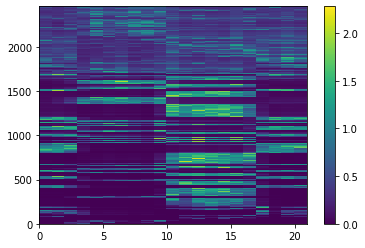

In [4]:
#use all of structure learning, both Part 1 and Part 2 to model SR
envstep = struct_all.objnum.values - 1
n_state = 21
M = np.zeros((n_state, n_state))
sr_reps = sr.neural_sr(envstep, 0.9, 0.5, M, n_state)
plt.pcolor(sr_reps)
plt.colorbar()
sr_reps.shape

(1575, 21)

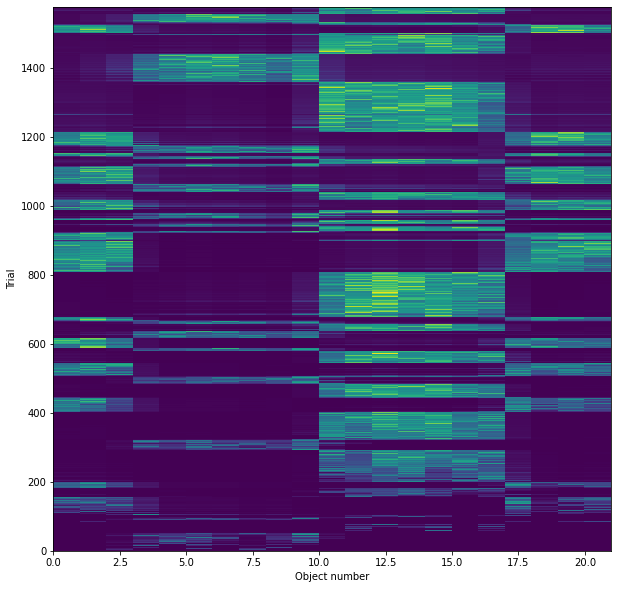

In [5]:
#now only extrat Part 1
sr_reps_part1 = sr_reps[struct_all['part'] == 1]
fig, ax = plt.subplots(figsize = (10, 10))
plt.pcolor(sr_reps_part1)
plt.xlabel('Object number')
plt.ylabel('Trial')
#plt.savefig('TesserScan_SR_part1_gamma_90_alpha_50.pdf', transparent = True)
sr_reps_part1.shape

(882, 21)

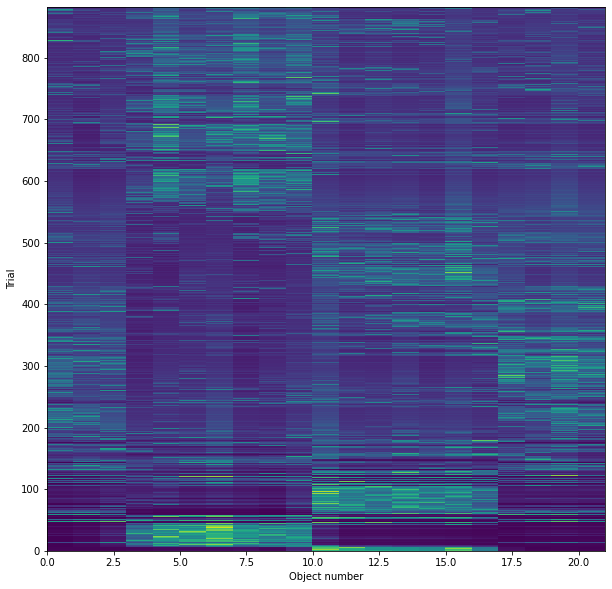

In [6]:
#now only extrat Part 2
sr_reps_part2 = sr_reps[struct_all['part'] == 2]
fig, ax = plt.subplots(figsize = (10, 10))
plt.pcolor(sr_reps_part2)
plt.xlabel('Object number')
plt.ylabel('Trial')
#plt.savefig('TesserScan_SR_part2_gamma_90_alpha_50.pdf', transparent = True)
sr_reps_part2.shape

(882, 859)

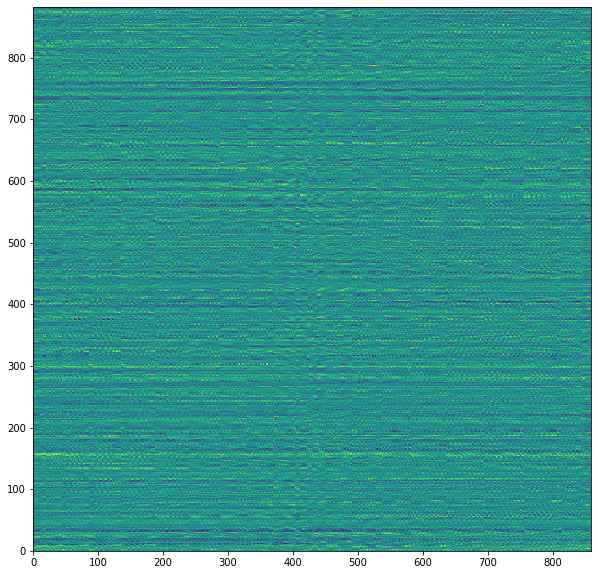

In [7]:
#import the neural data
patterns = rsa.load_zrep(data_dir, subject, roi)
fig, ax = plt.subplots(figsize = (10, 10))
#plt.savefig('TesserScan_neural_part2_gamma_90_alpha_50.pdf', transparent = True)
plt.pcolor(patterns)
patterns.shape

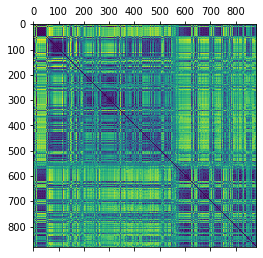

In [8]:
#make SR into square:
sr_rdm = distance.squareform(distance.pdist(sr_reps_part2, 'correlation'))
#make SR matrix symmetric:
sr_rdm_sym = rsa.make_sym_matrix(sr_rdm)
plt.matshow(sr_rdm_sym)

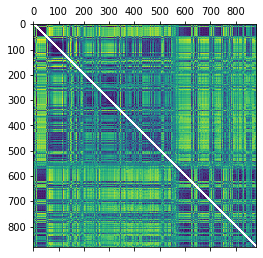

In [9]:
#removing autocorrelation trials in SR
sr_rem = rsa.exclude_rsa(sr_rdm_sym, 5)
plt.matshow(sr_rem)

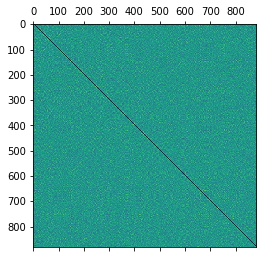

In [10]:
neural_rdm = distance.squareform(distance.pdist(patterns, 'correlation'))
#make neural matrix symmetric:
plt.matshow(neural_rdm)

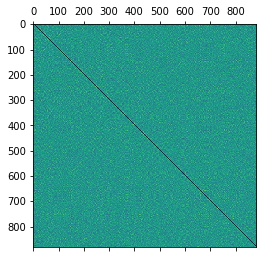

In [11]:
#make neural into square:
neural_rdm_sym = rsa.make_sym_matrix(neural_rdm)
plt.matshow(neural_rdm_sym)

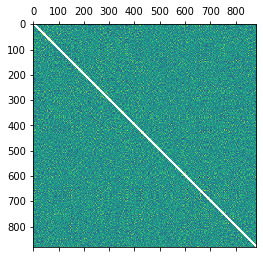

In [12]:
#removing autocorrelation trials in neural
neural_rem = rsa.exclude_rsa(neural_rdm_sym, 5)
plt.matshow(neural_rem)

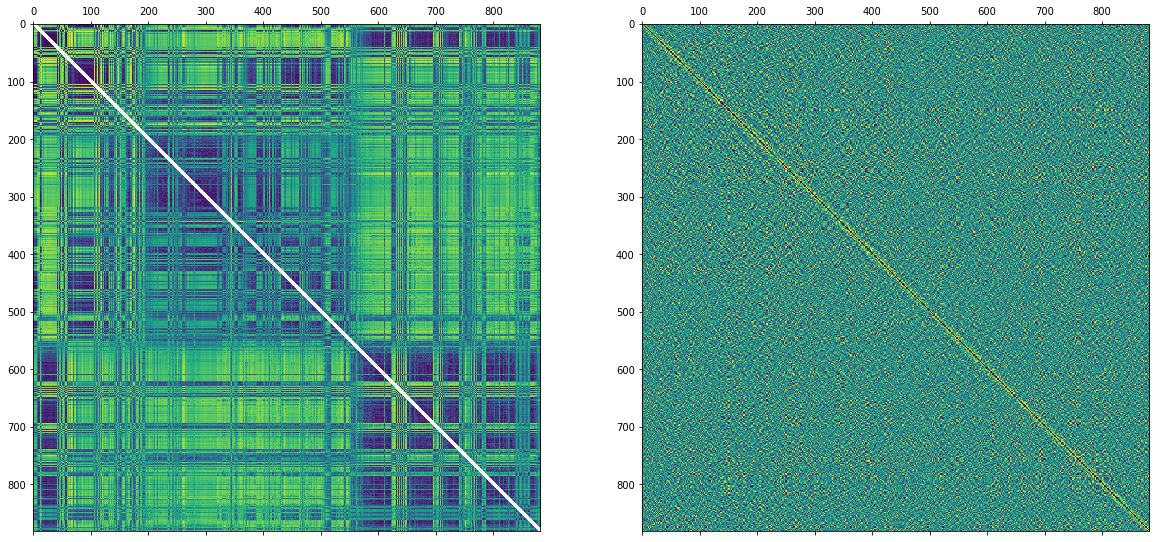

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].matshow(sr_rdm_sym)
vmin, vmax = np.percentile(distance.squareform(neural_rdm), [1, 99])
ax[1].matshow(neural_rdm, vmin=vmin, vmax=vmax)
#plt.savefig('TesserScan_SR_vs_Neural.pdf', transparent = True)

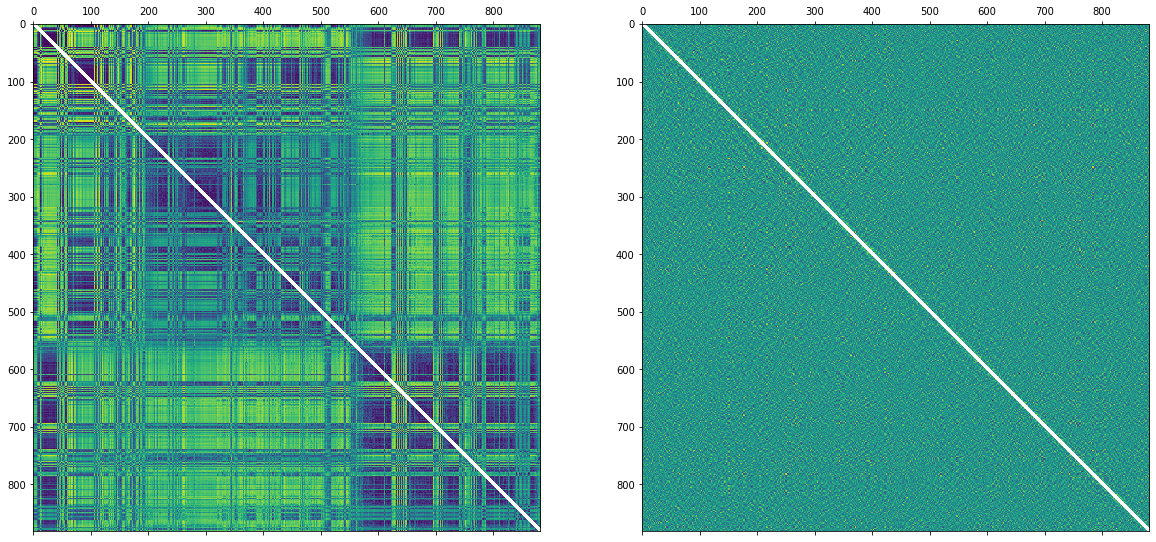

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].matshow(sr_rdm_sym)
ax[1].matshow(neural_rem)
#plt.savefig('TesserScan_SR_vs_Neural_rem.pdf', transparent = True)

In [15]:
checks=False